<a href="https://colab.research.google.com/github/CLOR2003/MLProject/blob/Luis/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Group: 2
### Names: Chakong Lor, Zach Sundary, Luis Aguilar
### Date: 10/21/2024
# Project 2: German Credit Risk



## Download the Data

In [1]:
!pip install openml # Run this cell if openml is not already installed

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.8 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=a93ee9157e6c1986e9fb947b99fc41b56f35261a8ccfd40004e4c59758a20cc5
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [2]:
import openml
import pandas as pd

def load_credit_data():
  dataset_id = 31
  dataset = openml.datasets.get_dataset(dataset_id) # Used for downloading data from source
  x,y,_, _ = dataset.get_data(target=dataset.default_target_attribute) # Extract data into x and y
  return pd.DataFrame(x),y

In [3]:
credit_data, target = load_credit_data()

### Exploring data

In [4]:
credit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes


In [5]:
target.head()

,class
0,good
1,bad
2,good
3,good
4,bad


In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   uint8   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   uint8   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   uint8   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   uint8   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [7]:
credit_data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


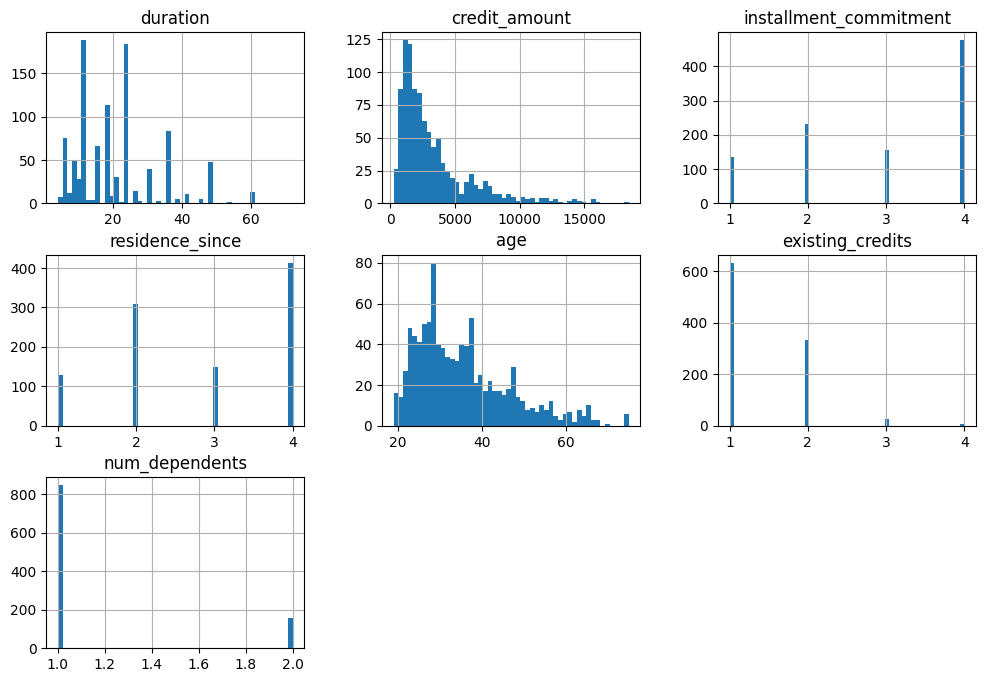

In [8]:
import matplotlib.pyplot as plt

credit_data.hist(bins=50,figsize=(12,8))
plt.show()

In [9]:
credit_data['checking_status'].value_counts()

,count
checking_status,
no checking,394
<0,274
0<=X<200,269
>=200,63


In [10]:
credit_data['credit_history'].value_counts()

,count
credit_history,
existing paid,530
critical/other existing credit,293
delayed previously,88
all paid,49
no credits/all paid,40


In [11]:
credit_data['purpose'].value_counts()

,count
purpose,
radio/tv,280
new car,234
furniture/equipment,181
used car,103
business,97
education,50
repairs,22
domestic appliance,12
other,12


### Creating a test set

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into 20% for test set and train set 80%
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(credit_data, target):
    credit_train, credit_test = credit_data.iloc[train_index], credit_data.iloc[test_index]
    target_train, target_test = target.iloc[train_index], target.iloc[test_index]

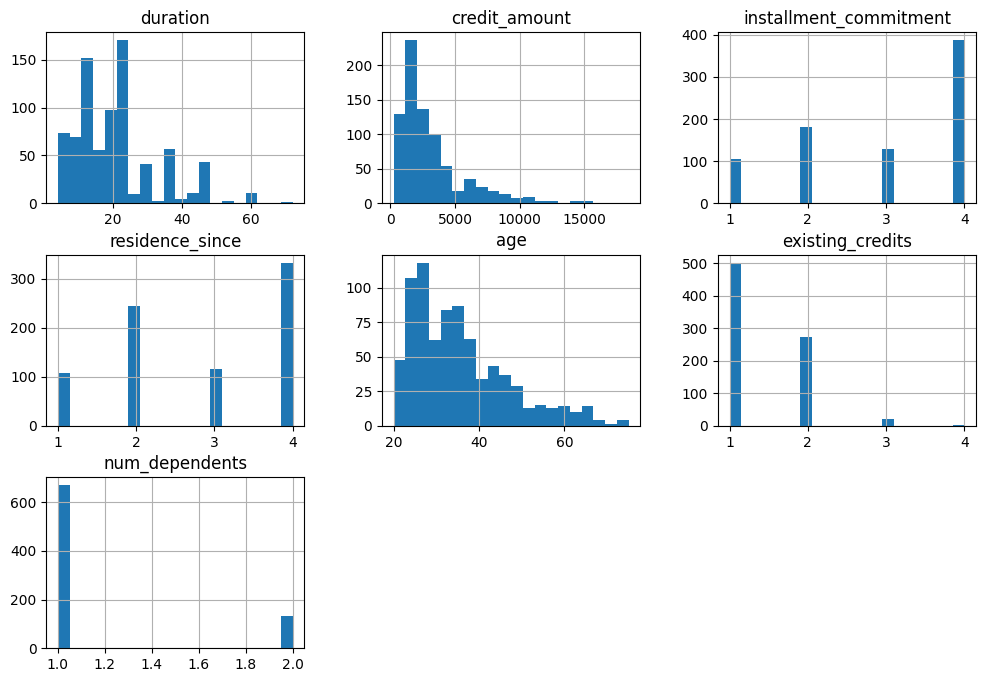

In [13]:
credit_train.hist(bins=20,figsize=(12,8)) # Display train set as a histogram
plt.show()

### Preprocess the data

In [14]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

numeric_columns = credit_train.select_dtypes(include=[np.number]).columns
categorical_columns = credit_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

## Model selection and training

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

pipeline.fit(credit_train, target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index([], dtype='object'))])),
                ('model', RandomForestClassifier())])

## Prediction

In [16]:
credit_predictions = pipeline.predict(credit_test)

## Model evaluation

In [17]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(target_test, credit_predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(target_test, credit_predictions))

Accuracy: 0.69
              precision    recall  f1-score   support

         bad       0.47      0.25      0.33        60
        good       0.73      0.88      0.80       140

    accuracy                           0.69       200
   macro avg       0.60      0.56      0.56       200
weighted avg       0.65      0.69      0.66       200



## Fine tuning parameters

### Tuning hyper parameters with random search

What we did for the fine tuning was we used the randomized search CV class. We use this method instead of using the which it is faster than using the grid search class since it needs to do a lot of times to find the best result that we are looking for. We made 6 variables for the system to find the best result. They are model_n_estimator , model_max_depth, model_min_samples_split, model_min_samples_leaf, model_bootstrap, and model_class_weight. The randomizer will choose the best hyperparameter to give us the best result.

In [18]:
from sklearn.model_selection import RandomizedSearchCV


# Tuning hyperparameters
param_dist = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__max_depth': [None, 10, 20, 30, 40],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False],
    'model__class_weight': [{'bad':2,'good':1}]
}

random_search = RandomizedSearchCV(pipeline, param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1, verbose=2)
random_search.fit(credit_train, target_train) # Train model again

print(f"parameters: {random_search.best_params_}")
print(f"accuracy: {random_search.best_score_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
parameters: {'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 40, 'model__class_weight': {'bad': 2, 'good': 1}, 'model__bootstrap': True}
accuracy: 0.6975


Our best parameters are model_n_estimator:300, model_min_samples_split: 2, model_min_samples_leaf: 1, model_max_depth: 10, model_class_weight: {‘bad’: 2, ‘good’: 1}, model_bootstrap: True. The best score or accuracy for this parameter that the system chose is 0.70125. This is a good result since it is closer to 1.

### Prediction and testing after fine tuning

In [19]:
final_model = random_search.best_estimator_
random_search_predictions = final_model.predict(credit_test)
print(classification_report(target_test, random_search_predictions))

              precision    recall  f1-score   support

         bad       0.53      0.27      0.36        60
        good       0.74      0.90      0.81       140

    accuracy                           0.71       200
   macro avg       0.64      0.58      0.58       200
weighted avg       0.68      0.71      0.68       200



After we got out best parameter for the model, we use that for our final prediction. What it returns is the accuracy of the whole model which is 70%. It chamge about 1% since the old prediction was 69%. However, the precision on those who are at bad crdit risk or bad is .04 higher than the original.

## Interpretations

In conclusion, we download a data called German Credit Risk and use it to make prediction that a new applicant is likely to be good or bad credit risk base on their information. Then, preprocess the data so it can be ready and be used for the model to be trained and learn the information. Since the data has no missing value, we can proceed to the next step. The model we have used for this is a random forest classifier. We chose this one due to improve predictive accuracy and control over fitting the data. After we get our prediction, we are tuning hyperparameter around to get a better result. The system has found the best result for the data which are  model_n_estimator:300, model_min_samples_split: 2, model_min_samples_leaf: 1, model_max_depth: 10, model_class_weight: {‘bad’: 2, ‘good’: 1}, model_bootstrap: True. When we rerun the new hyperparameter in the model we get a little better result.